USED CAR PRICES

![Datacamp image ](https://lh7-rt.googleusercontent.com/formsz/AN7BsVC2in9pOlhBcD49tHR0lmv3MkUHCczCa9vAFjEXJPKY-HkZqleID1bqXFlWD8aNbv7anKN_8IrFpucE0BQpDaS41El13yU70qHBuoINkVd7xcms916kSQ7wUbZvEb_oW3lKatcE1l3g0iHL9rwiqM_9vocmZy6bnXmOEpBaZl14jNKIqnYw6z5UE2hrrhG1HYodL6oHCLy0Dp4r=w1439?key=L9RxKEHrF9JugKI3C884uQ)





## **Problem Statement**

Determining the fair market value of used cars is a major challenge for buyers, sellers, and dealerships, as prices vary significantly depending on factors such as brand, mileage, fuel type, transmission, and ownership history. Traditional estimation methods may be subjective and prone to inaccuracies.
This project addresses the problem by leveraging machine learning techniques to create a data-driven predictive model that can estimate used car prices with greater accuracy and reliability.

## **Project Aim**

The aim of this project is to develop a machine learning model that can accurately predict the price of used cars based on various features. By analyzing and cleaning the dataset, training predictive models, and evaluating their performance, the project seeks to provide insights into the factors affecting car prices and build a reliable price prediction system.


## **Project Methodology**

In this project, we will be exploring used car data by utilizing this approach:
-	Data Understanding & EDA: Explore the dataset, visualize feature distributions, and identify missing values, outliers, and inconsistencies.

Data Cleaning & Preprocessing : Handle missing values, encode categorical features, remove duplicates/anomalies, standardize numerical features, and automate the process with a clean_data function.

Model Training : Train a Linear Regression model on the cleaned dataset and evaluate performance using metrics such as R², RMSE, and MAE.

Model Testing & Prediction : Apply the clean_data function on the test dataset and use the trained model to predict car prices.

Performance Improvement  : Compare results by training on both the generated dataset and the original dataset to check for accuracy improvements.




# About the Dataset


The train_data is a dataset with 188533 rows(entries) and 13 columns (features).
while The test_data is a dataset with 125690 rows(entries) and 12 columns (features).

## Data Attributes

Here are some basic informaton on the dataset columns.
> **columns info**:    
>  **Brand & Model** : Identify the brand or company name along with the specific model of each vehicle.    
>  **Model Year** : Discover the manufacturing year of the vehicles, crucial for assessing depreciation and technology advancements.    
> **Mileage** : Obtain the mileage of each vehicle, a key indicator of wear and tear and potential maintenance requirements.    
> **Fuel Type** : Learn about the type of fuel the vehicles run on, whether it's gasoline, diesel, electric, or hybrid.     
> **Engine Type** : Understand the engine specifications, shedding light on performance and efficiency.    
> **Transmission** : Determine the transmission type, whether automatic, manual, or another variant.    
> **Exterior & Interior Colors** : Explore the aesthetic aspects of the vehicles, including exterior and interior color options.    
> **Accident History** : Discover whether a vehicle has a prior history of accidents or damage, crucial for informed decision-making.    
> **Clean Title**: Evaluate the availability of a clean title, which can impact the vehicle's resale value and legal status.    
> **Price** : Access the listed prices for each vehicle, aiding in price comparison and budgeting.





### **Importing the necessary libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 27.3 MB/s eta 0:00:00


## **Data Collection**:

To collect, analyze the data and build a machine learning model in google colab using Python, The required libraries were imported.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np      # For mathematical calculations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For data visualization
import plotly.express as px     # For plotting graphs
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error
import optuna
import warnings
warnings.filterwarnings("ignore")

### **Reading the datasets into a DataFrame**

In [ ]:
df_sample = pd.read_csv(r"/content/drive/MyDrive/DSN Bootcamp Dataset/Submission.csv")
df_train = pd.read_csv(r"/content/drive/MyDrive/DSN Bootcamp Dataset/train.csv") #Reading the train dataset in a dataframe using Pandas
df_test = pd.read_csv(r"/content/drive/MyDrive/DSN Bootcamp Dataset/test.csv") #Reading the test dataset in a dataframe using Pandas

In [ ]:
df_train.head()   # check the first 5 rows of the data

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [ ]:
df_test.head()   # check the first 5 rows of the test data

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


# **Understanding our Dataset:**

We will look at the dataset. Firstly, we will do a preliminary data exploration on our dataset to check the features present in our data, and then we will look at the data types.

### **Preliminary Data Exploration**

In [ ]:
#checking the column of the train dataset
df_train.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [ ]:
#checking the column of the test dataset
df_test.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title'],
      dtype='object')

In the training dataset, we have 12 independent variables and 1 target variable, which is price.

likewise, the test dataset, we have 12 independent variables.

In [ ]:
# check the size of the train data
df_train.shape

(188533, 13)

We have 188533 rows and 13 columns in our train dataset

In [ ]:
# check the size of the train data
df_test.shape

(125690, 12)

We have 125690 rows and 12 columns in our test dataset

### Checking for the datatypes


In [ ]:
# Print data types for each variable
df_train.dtypes

,0
id,int64
brand,object
model,object
model_year,int64
milage,int64
fuel_type,object
engine,object
transmission,object
ext_col,object
int_col,object


In [ ]:
# Print data types for each variable
df_test.dtypes

,0
id,int64
brand,object
model,object
model_year,int64
milage,int64
fuel_type,object
engine,object
transmission,object
ext_col,object
int_col,object


We can see there are two formats of data types namely; Object and int64 data types

In [ ]:
# get the summary of numerical variables
df_train.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


## Checking for missing values

We will do the preprocessing of our dataset for filling the missing vales.

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     122307 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      124058 non-null  object
 11  clean_title   111451 non-null  object
dtypes: int64(3), object(9)
memory usage: 11.5+ MB


There are missing values in "fuel_type", "accident" and "clean_title" columns from the non-null counts.

# Handling Missing Values

For numerical variables: imputation using mean or median

For categorical variables: imputation using mode

In [ ]:
# check for actual number of missing values
df_train.isnull().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,5083
engine,0
transmission,0
ext_col,0
int_col,0


In [ ]:
# check for actual number of missing values
df_test.isnull().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,3383
engine,0
transmission,0
ext_col,0
int_col,0


There are missing values in fuel_type, accident and clean title

fuel_type, accident and clean_title

 Since "fuel_Type", "accident", "clean_title" are categorical variables, it would be more appropriate to use the mode to impute the missing values.


## fuel_type, accident, clean_title
Imputing the missing values


In [ ]:
for col in ["fuel_type","accident","clean_title"]:
    print(f"Unique values in '{col}':")
    print(df_train[col].unique())
    print("-" * 30)

Unique values in 'fuel_type':
['Gasoline' 'E85 Flex Fuel' nan 'Hybrid' 'Diesel' 'Plug-In Hybrid' '–'
 'not supported']
------------------------------
Unique values in 'accident':
['None reported' 'At least 1 accident or damage reported' nan]
------------------------------
Unique values in 'clean_title':
['Yes' nan]
------------------------------


In [ ]:
for col in ["fuel_type","accident","clean_title"]:
    print(f"Unique values in '{col}':")
    print(df_test[col].unique())
    print("-" * 30)

Unique values in 'fuel_type':
['Gasoline' 'Hybrid' 'Diesel' 'E85 Flex Fuel' nan 'Plug-In Hybrid' '–'
 'not supported']
------------------------------
Unique values in 'accident':
['None reported' 'At least 1 accident or damage reported' nan]
------------------------------
Unique values in 'clean_title':
['Yes' nan]
------------------------------


In [ ]:
for col in ["fuel_type","accident","clean_title"]:
    print(f"Value counts for '{col}':")
    print(df_train[col].value_counts())
    print("-" * 30)

Value counts for 'fuel_type':
fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64
------------------------------
Value counts for 'accident':
accident
None reported                             144514
At least 1 accident or damage reported     41567
Name: count, dtype: int64
------------------------------
Value counts for 'clean_title':
clean_title
Yes    167114
Name: count, dtype: int64
------------------------------


In [ ]:
for col in ["fuel_type", "accident", "clean_title"]:
    # Impute missing values with the mode for the training set
    df_train[col].fillna(df_train[col].mode()[0], inplace=True)
    # Impute missing values with the mode for the test set
    df_test[col].fillna(df_test[col].mode()[0], inplace=True)

In [ ]:
df_train.isnull().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0


In [ ]:
df_test.isnull().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0


In [ ]:
#Checking for number of duplicates
df_train.duplicated().sum()

np.int64(0)

In [ ]:
#Checking for number of duplicates
df_test.duplicated().sum()

np.int64(0)

There is no duplicate in our datasets


# Exploratory Data Analysis

We want to explore each columns in the train dataset to see the distributions of features, and to get some useful informations before building the data model.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Descriptive Statistics

In [ ]:
#Check the statistics of the columns
#Note, only the columns with numerical datatype are listed
# We will use the describe method to print the summary statistics on the numeric features
df_train.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'model_year'}>],
       [<Axes: title={'center': 'milage'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

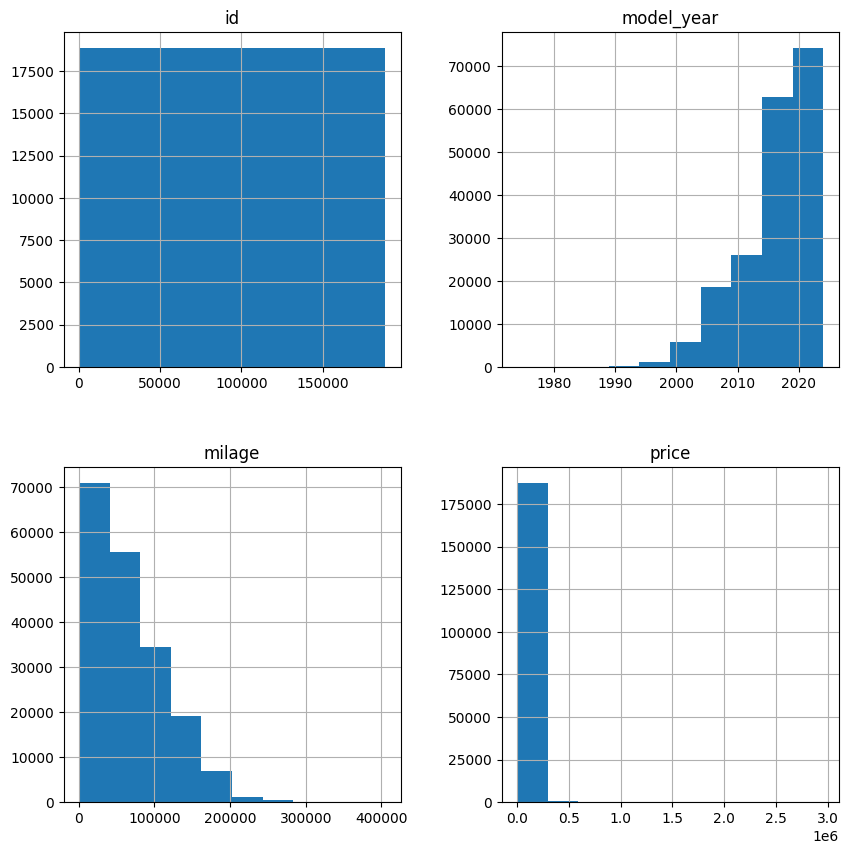

In [ ]:
# Check the distribution of data in the columns with numerical data type
df_train.hist(figsize=(10,10))

In [ ]:
# Set plot style
plt.style.use("seaborn-v0_8")

In [ ]:
# Set a visual style
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

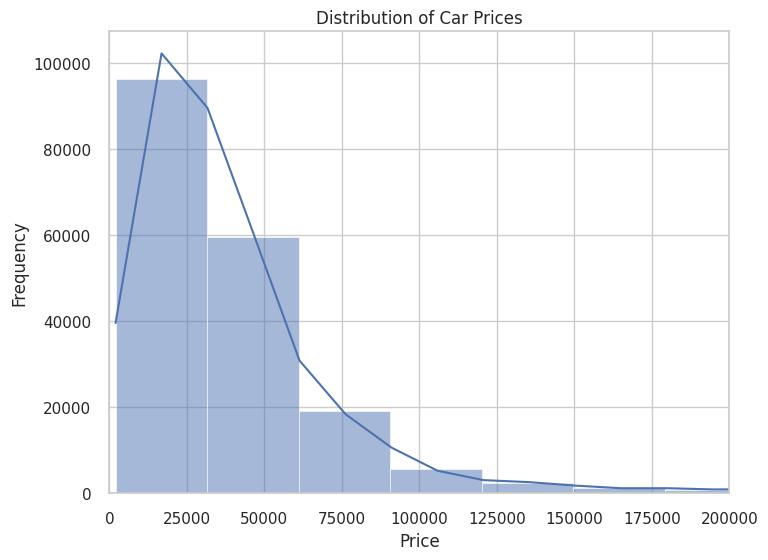

In [ ]:
# Distribution of target variable (price)
plt.figure(figsize=(8, 6))
sns.histplot(df_train["price"], bins=100, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.xlim(0, 200000)  # limit to better visualize
plt.show()

2. Distribution of mileage

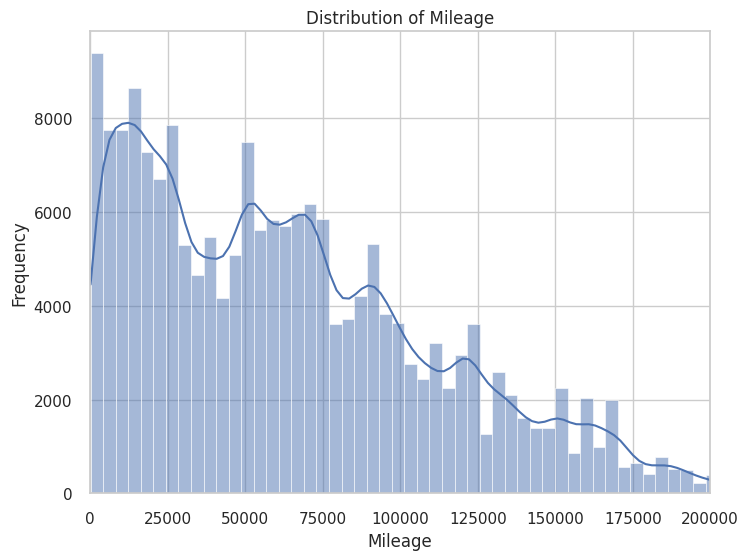

In [ ]:
# Distribution of mileage
plt.figure(figsize=(8, 6))
sns.histplot(df_train["milage"], bins=100, kde=True)
plt.title("Distribution of Mileage")
plt.xlabel("Mileage")
plt.ylabel("Frequency")
plt.xlim(0, 200000)
plt.show()


Relationship between Item Price and Item Store Returns

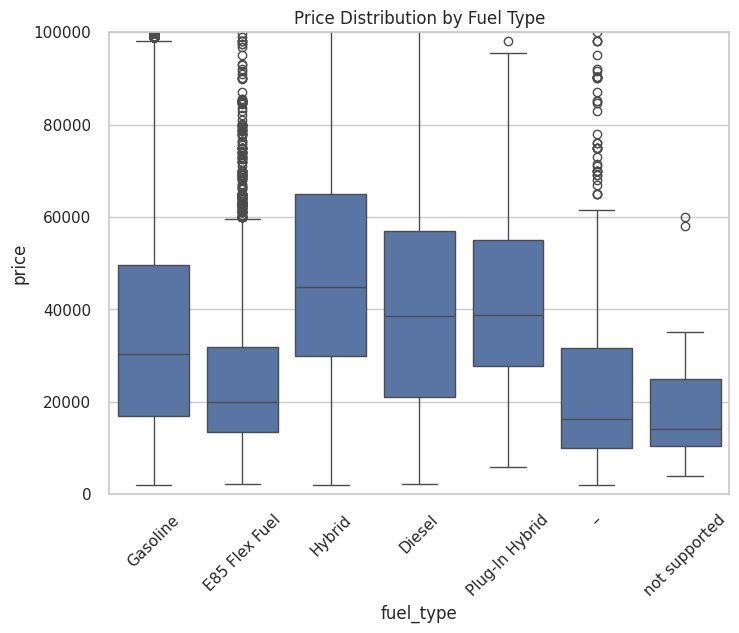

In [ ]:
# Boxplot of price vs fuel type
plt.figure(figsize=(8, 6))
sns.boxplot(x="fuel_type", y="price", data=df_train)
plt.title("Price Distribution by Fuel Type")
plt.xticks(rotation=45)
plt.ylim(0, 100000)
plt.show()

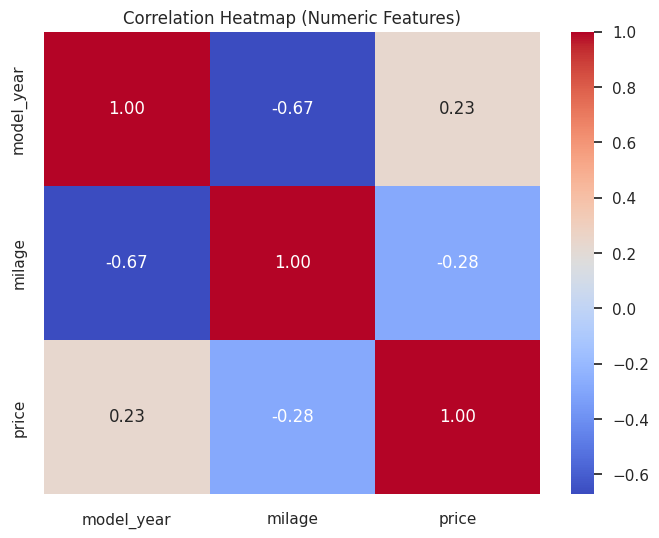

In [ ]:
# Correlation heatmap (numeric features only)
plt.figure(figsize=(8, 6))
numeric_corr = df_train[["model_year", "milage", "price"]].corr()
sns.heatmap(numeric_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

Building a Predictive Model


To build a prediction model, the following steps will be taken

Create new variables by extracting from the engine features

Encode categorical variables.

Train a regression model (e.g., Random Forest Regressor).

Predict price.

##Feature engineering  -

New variables like horsepower, engine litres and Cylinders features are to be created by extracting from the engine features.



In [ ]:
def add_engine_features(df):
    """Extract horsepower, liters, and cylinders from the engine column."""

    # Horsepower
    df["horsepower"] = df["engine"].str.extract(r"(\d+\.?\d*)HP").astype(float)

    # Engine size in Liters
    df["engine_liters"] = df["engine"].str.extract(r"(\d+\.?\d*)L").astype(float)

    # Cylinders
    df["cylinders"] = df["engine"].str.extract(r"(\d+)\s*Cylinder").astype(float)

## Drop the original text column "engine"

In [ ]:
# Drop original text column
def drop_engine_column(df):
    df.drop(columns=["engine"], inplace=True)
    return df

### Encoding Categorical Variable using Label Encoding

##Creating a seperate function for encode categories

In [ ]:
from sklearn.preprocessing import LabelEncoder

def encode_categoricals(df):
    """Convert text columns into numeric codes using Label Encoding."""

    cat_cols = df.select_dtypes(include=["object"]).columns

    for col in cat_cols:
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col].astype(str))

    return df

Cleaning the train and test Dataset

In [ ]:
def clean_data(df, is_train=True):
    df = df.copy()
    """Applies cleaning and feature engineering steps to a DataFrame."""

    # Add new engine features
    add_engine_features(df)

    # Drop the original engine column as it's no longer needed
    df = drop_engine_column(df)

    # Identify numerical columns, including the newly created ones
    numerical_cols = df.select_dtypes(include=np.number).columns

    # Impute missing values in all numerical columns using the median
    for col in numerical_cols:
        if col in df.columns: # Double check column existence
             df[col].fillna(df[col].median(), inplace=True)


    # Encode categorical variables
    df = encode_categoricals(df)

    # Cap outliers - ensure 'price' is only processed if it exists (i.e., in train data)
    for col in ["milage", "price"] if "price" in df.columns else ["milage"]:
        # Re-check for NaNs after imputation and encoding, though ideally there shouldn't be any here for numerical cols
        if df[col].isnull().any():
             df[col].fillna(df[col].median(), inplace=True) # Fallback imputation
        lower, upper = df[col].quantile([0.01, 0.99])
        df[col] = np.clip(df[col], lower, upper)

    return df

In [ ]:

df_train_clean = clean_data(df_train.copy())
df_test_clean = clean_data(df_test.copy())

print("Cleaned df_train_clean head:")
display(df_train_clean.head())

print("\nCleaned df_test_clean head:")
display(df_test_clean.head())

Cleaned df_train_clean head:


,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,horsepower,engine_liters,cylinders
0,0,31,495,2007,201509,2,38,312,71,1,0,4200,172.0,1.6,4.0
1,1,28,930,2002,143250,2,38,263,10,0,0,4999,252.0,3.9,8.0
2,2,9,1575,2002,136731,1,38,38,71,1,0,13900,320.0,5.3,8.0
3,3,16,758,2017,19500,2,49,29,14,1,0,45000,420.0,5.0,8.0
4,4,36,1077,2021,7388,2,23,29,10,1,0,97500,208.0,2.0,4.0



Cleaned df_test_clean head:


,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,horsepower,engine_liters,cylinders
0,188533,26,1388,2015,98000,2,16,302,10,1,0,240.0,2.0,4.0
1,188534,26,1375,2020,9142,3,31,261,14,1,0,395.0,3.0,6.0
2,188535,14,636,2022,28121,2,3,302,57,1,0,328.0,3.5,6.0
3,188536,3,182,2016,61258,2,39,259,14,1,0,328.0,3.5,6.0
4,188537,3,181,2018,59000,2,38,127,14,1,0,252.0,2.0,4.0


In [ ]:
df_train_clean.head()

,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,horsepower,engine_liters,cylinders
0,0,31,495,2007,201509,2,38,312,71,1,0,4200,172.0,1.6,4.0
1,1,28,930,2002,143250,2,38,263,10,0,0,4999,252.0,3.9,8.0
2,2,9,1575,2002,136731,1,38,38,71,1,0,13900,320.0,5.3,8.0
3,3,16,758,2017,19500,2,49,29,14,1,0,45000,420.0,5.0,8.0
4,4,36,1077,2021,7388,2,23,29,10,1,0,97500,208.0,2.0,4.0


In [ ]:
df_test_clean.head()

,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,horsepower,engine_liters,cylinders
0,188533,26,1388,2015,98000,2,16,302,10,1,0,240.0,2.0,4.0
1,188534,26,1375,2020,9142,3,31,261,14,1,0,395.0,3.0,6.0
2,188535,14,636,2022,28121,2,3,302,57,1,0,328.0,3.5,6.0
3,188536,3,182,2016,61258,2,39,259,14,1,0,328.0,3.5,6.0
4,188537,3,181,2018,59000,2,38,127,14,1,0,252.0,2.0,4.0


### Feature Selection

Split training data into features (X) and target (y)
Target variable (Price) will be seperated from other features.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
df_train_clean.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'horsepower', 'engine_liters', 'cylinders'],
      dtype='object')

In [ ]:
features= ['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'horsepower', 'engine_liters', 'cylinders']
target= "price"

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the training dataset

We will Create feature matrix X and target vector y, where our target is "price", and our features are the columns that remain in the dataframe.

<Axes: >

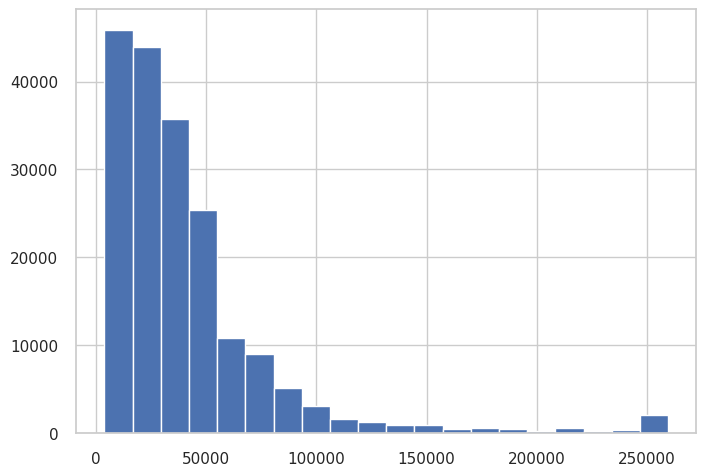

In [ ]:
# Prepare features and target
X_train= df_train_clean.drop(columns=["price"])
y_train = df_train_clean["price"]
X_test = df_test_clean
y_train.hist(bins=20)

In [ ]:
X_train.head()

,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,horsepower,engine_liters,cylinders
0,0,31,495,2007,201509,2,38,312,71,1,0,172.0,1.6,4.0
1,1,28,930,2002,143250,2,38,263,10,0,0,252.0,3.9,8.0
2,2,9,1575,2002,136731,1,38,38,71,1,0,320.0,5.3,8.0
3,3,16,758,2017,19500,2,49,29,14,1,0,420.0,5.0,8.0
4,4,36,1077,2021,7388,2,23,29,10,1,0,208.0,2.0,4.0


In [ ]:
y_train.head()

,price
0,4200
1,4999
2,13900
3,45000
4,97500


Data Normalization - MinMaxScaler helps to bring features to a uniform scale.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Normalize features
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.drop('id', axis=1)), columns=X_train.drop('id', axis=1).columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test.drop('id', axis=1)), columns=X_test.drop('id', axis=1).columns)

### Data Splitting

The data set will be split into 80% training set and 20% test set for evaluation.

In [ ]:
from sklearn.model_selection import train_test_split
X_train_df_train_clean, X_train_df_test_clean, y_train_df_train_clean, y_train_df_test_clean = train_test_split(X_train, y_train, train_size=0.8, test_size=0.2, random_state=42)

In [ ]:
# import libraries for model building and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

Let us make our first model predict the target variable by starting with Linear Regression.

#### Linear Regression:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math

# Initialize and train the Linear Regression model
LR = LinearRegression()
LR.fit(X_train_df_train_clean.drop('id', axis=1), y_train_df_train_clean)

# Make predictions on the test set
y_pred_LR = LR.predict(X_train_df_test_clean.drop('id', axis=1))

# Evaluate the model
MSE_LR= mean_squared_error(y_train_df_test_clean, y_pred_LR)
R2_LR = r2_score(y_train_df_test_clean, y_pred_LR)
RMSE_LR = math.sqrt(MSE_LR)

print(f"Linear Regression Mean Squared Error: {MSE_LR}")
print("RMSE", math.sqrt(mean_squared_error(y_train_df_test_clean, y_pred_LR)))
print(f"Linear Regression R-squared: {R2_LR}")

Linear Regression Mean Squared Error: 1128400326.3794634
RMSE 33591.67049105274
Linear Regression R-squared: 0.31134066216538925


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb


# Decision Tree Regressor
DTR = DecisionTreeRegressor(random_state=42)
DTR.fit(X_train_df_train_clean.drop('id', axis=1), y_train_df_train_clean)
y_pred_DTR = DTR.predict(X_train_df_test_clean.drop('id', axis=1))
MSE_DTR = mean_squared_error(y_train_df_test_clean, y_pred_DTR)
RMSE_DTR =math.sqrt(MSE_DTR)
R2_DTR = r2_score(y_train_df_test_clean, y_pred_DTR)
print(f"Decision Tree Regressor MSE: {MSE_DTR}")
print("RMSE", math.sqrt(mean_squared_error(y_train_df_test_clean, y_pred_DTR)))
print(f"Decision Tree Regressor R-squared: {R2_DTR}")

Decision Tree Regressor MSE: 1889606262.7071536
RMSE 43469.60159360968
Decision Tree Regressor R-squared: -0.1532210397521958


# Advanced Model Tuning

Using RandomizedSearchCV and Optuna with cross-validation to tune our models:

We will be using RandomForestRegressor, GradientBoostRegressor and XGBRegressor models


In [ ]:
# Random Forest Regressor
RFR = RandomForestRegressor(random_state=42)
RFR.fit(X_train_df_train_clean.drop('id', axis=1), y_train_df_train_clean)
y_pred_RFR = RFR.predict(X_train_df_test_clean.drop('id', axis=1))
MSE_RFR = mean_squared_error(y_train_df_test_clean, y_pred_RFR)
RMSE_RFR = math.sqrt(MSE_RFR)
R2_RFR = r2_score(y_train_df_test_clean, y_pred_RFR)
print(f"Random Forest Regressor MSE: {MSE_RFR}")
print(f"RMSE", math.sqrt(MSE_RFR))
print(f"Random Forest Regressor R-squared: {R2_RFR}")

Random Forest Regressor MSE: 988391156.929776
RMSE 31438.6888551316
Random Forest Regressor R-squared: 0.3967878387302527


In [ ]:
# Gradient Boosting Regressor
GBR = GradientBoostingRegressor(random_state=42)
GBR.fit(X_train_df_train_clean.drop('id', axis=1), y_train_df_train_clean)
y_pred_GBR = GBR.predict(X_train_df_test_clean.drop('id', axis=1))
MSE_GBR = mean_squared_error(y_train_df_test_clean, y_pred_GBR)
RMSE_GBR = math.sqrt(MSE_GBR)
R2_GBR = r2_score(y_train_df_test_clean, y_pred_GBR)
print(f"Gradient Boosting Regressor MSE: {MSE_GBR}")
print(f"RMSE", math.sqrt(MSE_GBR))
print(f"Gradient Boosting Regressor R-squared: {R2_GBR}")

Gradient Boosting Regressor MSE: 939304046.9627763
RMSE 30648.067589373008
Gradient Boosting Regressor R-squared: 0.4267455548490984


In [ ]:
# XGBoost Regressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import math

xgb = XGBRegressor(random_state=42)
 #Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train.drop('id', axis=1), y_train)
xgb.fit(X_train.drop('id', axis=1), y_train)
y_pred_XGBR = xgb.predict(X_train_df_test_clean.drop('id', axis=1))
MSE_XGBR = mean_squared_error(y_train_df_test_clean, y_pred_XGBR)
RMSE_XGBR = math.sqrt(MSE_XGBR)
R2_XGBR = r2_score(y_train_df_test_clean, y_pred_XGBR)
print(f"XGBoost Regressor MSE: {MSE_XGBR}")
print(f"RMSE", math.sqrt(MSE_XGBR))
print(f"XGBoost Regressor R-squared: {R2_XGBR}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
XGBoost Regressor MSE: 793857024.0
RMSE 28175.46847880262
XGBoost Regressor R-squared: 0.5155113935470581


# Advanced Model Tuning

Using LightGBM, CatBoost and stacked Regressor to tune our model:

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.4 MB/s eta 0:00:00


In [ ]:
import lightgbm as lgb
import xgboost as xgb
import catboost as cb
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Base Models
xgb_model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method="hist"
)

lgb_model = lgb.LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

cat_model = cb.CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=7,
    random_seed=42,
    verbose=0
)

# Stacking
stacked_model = StackingRegressor(
    estimators=[
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('cat', cat_model)
    ],
    final_estimator=RidgeCV()
)

# Cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(stacked_model, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error')
print("CV RMSE:", np.mean(-scores))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1545
[LightGBM] [Info] Number of data points in the train set: 150826, number of used features: 13
[LightGBM] [Info] Start training from score 41142.532866
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1542
[LightGBM] [Info] Number of data points in the train set: 120660, number of used features: 13
[LightGBM] [Info] Start training from score 41102.654318
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1539
[LightGBM] [Info] Number of data points in the train set: 120661, number of used features: 13
[LightGBM] [Info

# Best performing model:

Best Performing Model Summary
We explored several regression models to predict car price, with the goal of maximizing predictive performance and minimizing error. Here's a summary of model performances:

Best Performing Model (Summary)

Several regression models were tested to predict used car prices.

Linear Regression: Weak performance (R² = 0.31, RMSE ≈ ₦33.6k).

Decision Tree: Overfit and generalized poorly (R² = –0.15, RMSE ≈ ₦43.5k).

Random Forest: Moderate improvement (R² = 0.40, RMSE ≈ ₦31.4k).

Gradient Boosting: Stronger results (R² = 0.43, RMSE ≈ ₦30.6k).

XGBoost (Best Model): Best performance (R² = 0.52, RMSE ≈ ₦28.2k), effectively capturing non-linear relationships.

Among all models tested, the XGBoost Regressor emerged as the best-performing model. It struck the best balance between bias and variance, outperforming linear and tree-based methods. While its R² score (0.516) suggests room for improvement, it provides a solid baseline for car price prediction.



Stacked Ensemble (XGBoost, CatBoost, LightGBM):
We will use stacked ensemble as the final model for submission. The ensemble leverages the strengths of each model and delivers improved generalization, backed by K-Fold cross-validation.

After improving the Stacking Regressor, let’s now see how the model performs on the  test data set provided

## Submission

In [ ]:
# Fit final model
stacked_model.fit(X_train, y_train)
y_pred = stacked_model.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1545
[LightGBM] [Info] Number of data points in the train set: 188533, number of used features: 13
[LightGBM] [Info] Start training from score 41182.284465
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1544
[LightGBM] [Info] Number of data points in the train set: 150826, number of used features: 13
[LightGBM] [Info] Start training from score 41173.007718
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035891 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

In [ ]:
y_pred

array([16923.21343014, 78134.52581864, 53521.3070303 , ...,
       21110.63078881, 15651.78120883, 38013.22711879])

In [ ]:
# Reading the sample submission dataset
df_sample = pd.read_csv(r"/content/drive/MyDrive/DSN Bootcamp Dataset/Submission.csv")

In [ ]:
# Submission hygiene
df_submit = df_sample.copy()
df_submit = df_submit.merge(df_test_clean[['id']], on='id')
df_submit['price'] = y_pred
df_submit.to_csv("used_car_pred_submission.csv", index=False)

In [ ]:
# Preview
df_submit.head()

,id,price
0,188533,16923.213430
1,188534,78134.525819
2,188535,53521.307030
3,188536,27695.027527
4,188537,29494.977453
